<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="##-TODO-Добавить-тест-модели-на-тестовом-датасете" data-toc-modified-id="#-TODO-Добавить-тест-модели-на-тестовом-датасете-1"><span class="toc-item-num">1&nbsp;&nbsp;</span># TODO Добавить тест модели на тестовом датасете</a></span></li><li><span><a href="#Новый-раздел" data-toc-modified-id="Новый-раздел-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Новый раздел</a></span></li><li><span><a href="#TODO-добавить-батч-норм,-еще-уменьшить-размер-фичматрицы,-увеличить-число-выходных-каналов,-поправить-при-изменении-числа-каналов-и-размера-фич-матриц" data-toc-modified-id="TODO-добавить-батч-норм,-еще-уменьшить-размер-фичматрицы,-увеличить-число-выходных-каналов,-поправить-при-изменении-числа-каналов-и-размера-фич-матриц-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>TODO добавить батч норм, еще уменьшить размер фичматрицы, увеличить число выходных каналов, поправить при изменении числа каналов и размера фич матриц</a></span></li></ul></div>

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torchvision.models as models
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [18]:
# архитектура модели
# гиперпараметры
# загрузчик данных
# формирование батча
# инициализировать модель
# оптимизатор
# функция потерь
# опционально шедулеры
# трейн луп

In [19]:
# hyperparams
inp_dim = 28 * 28
hidden = 256
out_dim = 10
device_id = -1
device = 'cpu' if device_id == -1 else f'cuda:{device_id}' # 'cuda:0' id GPU
n_epochs = 10
batch_size = 128

In [20]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5), (0.5)),
     ])

# зашружаем тренировочный сет
dataset_train = datasets.MNIST('.', 
                               train=True,            
                               download=True, 
                               transform=transform)

dataset_test = datasets.MNIST('.', 
                              train=False,
                              download=True, 
                              transform=transform)


In [21]:
dataset_train

Dataset MNIST
    Number of datapoints: 60000
    Root location: .
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=0.5, std=0.5)
           )

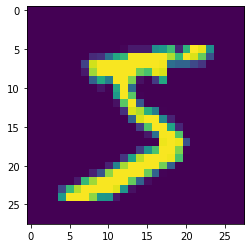

In [22]:

plt.imshow(dataset_train.data[0].detach().numpy())
plt.show()

In [23]:
class LinearModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, dropout_p=0.1):
        super().__init__()
        self.linear1 = nn.Linear(input_dim, hidden_dim)
        # custom init nn.init.xavier_uniform(self.linear1.weight) 
        self.do = nn.Dropout(dropout_p)
        self.linear2 = nn.Linear(hidden_dim, output_dim)
        self.activ = nn.ReLU()

    def forward(self, x):
        x = self.linear1(x)
        x = self.activ(x)
        x = self.do(x)
        x = self.linear2(x)

        return x


In [24]:
# Как формируется батч
# dataloader берет из Samler набор индексов и по этим индексам получает элементы из Dataset
dataset = datasets.MNIST('.', train=True, download=True)

def collate_fn(data: list):
    # data = [(pic, target)...]
    pics = []
    targets = []
    for item in data:
        pics.append(np.array(item[0]))
        targets.append(item[1])
    pics = torch.from_numpy(np.array(pics)).float() / 255
    pics = pics.view(pics.size(0), -1) # mtx 28x28 to vec 7xx
    targets = torch.from_numpy(np.array(targets)).long() 

    return {
        'data': pics,
        'target': targets,
    }

In [25]:
dataloader = DataLoader(dataset, 
                        batch_size, 
                        shuffle=True, 
                        collate_fn=collate_fn,
                        drop_last = True,
                        )

In [26]:
model = LinearModel(inp_dim, hidden, out_dim).to(device)
model.train() 
optim = torch.optim.Adam(model.parameters())
loss_func = nn.CrossEntropyLoss()


In [27]:
60000 // 128 # число шагов

468

In [28]:
%%time
for epoch in range(n_epochs):
    
    for i, batch in enumerate(dataloader):
        optim.zero_grad()

        predict = model(batch['data'].to(device))
        loss = loss_func(predict, batch['target'].to(device))
        loss.backward()
        optim.step()
        if i % 400 == 0:
            print(f'epoch: {epoch}, step: {i}, loss: {loss.item()}')
    
    # TODO Добавить тест модели на тестовом датасете
    #save every epoch
    torch.save(model.state_dict(), f'./chkpt_cv1_{epoch}.pth')

epoch: 0, step: 0, loss: 2.3256566524505615
epoch: 0, step: 400, loss: 0.24863164126873016
epoch: 1, step: 0, loss: 0.1866837739944458
epoch: 1, step: 400, loss: 0.1802678108215332
epoch: 2, step: 0, loss: 0.15401174128055573
epoch: 2, step: 400, loss: 0.20945627987384796
epoch: 3, step: 0, loss: 0.07076079398393631
epoch: 3, step: 400, loss: 0.1127411276102066
epoch: 4, step: 0, loss: 0.09655692428350449
epoch: 4, step: 400, loss: 0.12551946938037872
epoch: 5, step: 0, loss: 0.05767649784684181
epoch: 5, step: 400, loss: 0.05798543244600296
epoch: 6, step: 0, loss: 0.061698488891124725
epoch: 6, step: 400, loss: 0.05849219486117363
epoch: 7, step: 0, loss: 0.028642509132623672
epoch: 7, step: 400, loss: 0.039902519434690475
epoch: 8, step: 0, loss: 0.02105235867202282
epoch: 8, step: 400, loss: 0.06610986590385437
epoch: 9, step: 0, loss: 0.01556933019310236
epoch: 9, step: 400, loss: 0.033495668321847916
CPU times: user 40.7 s, sys: 196 ms, total: 40.9 s
Wall time: 44.2 s


## TODO Добавить тест модели на тестовом датасете

In [29]:
dataloader_test = DataLoader(dataset_test, 
                        batch_size, 
                        shuffle=True, 
                        collate_fn=collate_fn,
                        drop_last = True,
                        )

In [30]:
%%time
loss = 0
model.eval()
with torch.no_grad():
  for i, batch in enumerate(dataloader_test):
    predict = model(batch['data'].to(device))
    loss += loss_func(predict, batch['target'].to(device)).item()
loss /= i
print("loss on test data is ", loss)

loss on test data is  2.5099490215251974
CPU times: user 2 s, sys: 13.1 ms, total: 2.01 s
Wall time: 2.01 s


In [31]:
#loss на тестовых данных сопоставим с loss в начале обучения. Что говорит о неэффективности обучения.

# Новый раздел

In [32]:
# hyperparams
input_ch = 1
hidden_ch = 128
out_dim = 10
device_id = 0
device = 'cpu' if device_id == -1 else f'cuda:{device_id}'
n_epochs = 10
batch_size = 128

# TODO добавить батч норм, еще уменьшить размер фичматрицы, увеличить число выходных каналов, поправить при изменении числа каналов и размера фич матриц

In [37]:
class ConvDO(nn.Module):
    def __init__(self, input_ch, output_ch, kernel_size, stride, padding, 
                 dropout_p=0.1):
        super().__init__()
        self.conv = nn.Conv2d(
            input_ch, 
            output_ch, 
            kernel_size=kernel_size,
            stride=stride,
            padding=padding, 
        )
        # TODO добавить батч норм
        self.bn = nn.BatchNorm2d(output_ch, output_ch)
        self.do = nn.Dropout(dropout_p)

    def forward(self, x):

        return self.do(self.conv(x))

class ConvModel(nn.Module):
    def __init__(self, input_ch, hidden_ch, output_dim, dropout_p=0.1):
        super().__init__()
       # self.conv1 = ConvDO(input_ch, hidden_ch, 5, 2, 2) # уменьшим размер выходной фичматрицы в 2 раза
        # TODO еще уменьшить размер фичматрицы

        self.conv1 = ConvDO(input_ch, hidden_ch, 8, 4, 2)
#        self.conv1_1 = ConvDO(hidden_ch, hidden_ch, 4, 2, 1) 
        self.conv2 = ConvDO(hidden_ch, hidden_ch, 3, 1, 1)
        # TODO увеличить число выходных каналов
        self.conv3 = ConvDO(hidden_ch, 8, 3, 1, 1)
        self.linear = nn.Linear(
            7 * 7 * 8,
             #14 * 14, # TODO поправить при изменении числа каналов и размера фич матриц
            output_dim,
        )  
        self.activ = nn.ReLU()    

    def forward(self, x):
        x = self.activ(self.conv1(x))
#       x = self.activ(self.conv1_1(x))
        x = self.activ(self.conv2(x))
        x = self.activ(self.conv3(x))
        x = self.linear(x.view(x.size(0), -1))

        return x

In [38]:
trainloader = torch.utils.data.DataLoader(dataset_train, 
                                          batch_size=batch_size,
                                          shuffle=True, 
                                          num_workers=2, 
                                          drop_last = True,)

testloader = torch.utils.data.DataLoader(dataset_test, 
                                          batch_size=batch_size,
                                          shuffle=True, 
                                          num_workers=2, 
                                          drop_last = True,)

In [39]:
model_conv = ConvModel(input_ch, hidden_ch, out_dim).to(device)
optim = torch.optim.Adam(model_conv.parameters())
loss_func = nn.CrossEntropyLoss()

In [40]:
%%time
for epoch in range(n_epochs):
    for i, batch in enumerate(trainloader):
        inputs, labels = batch
        optim.zero_grad()

        predict = model_conv(inputs.to(device))
        loss = loss_func(predict, labels.to(device))
        loss.backward()
        optim.step()
        if i % 200 == 0:
            print(f'epoch: {epoch}, step: {i}, loss: {loss.item()}')
    
    
    model_conv.train()
    # print('test loss:', loss_test / i)
    #save every epoch

    torch.save(model_conv.state_dict(), f'./chkpt_cv1_conv_{epoch}.pth')


epoch: 0, step: 0, loss: 2.308034658432007
epoch: 0, step: 200, loss: 0.21780849993228912
epoch: 0, step: 400, loss: 0.12412478774785995
epoch: 1, step: 0, loss: 0.19650520384311676
epoch: 1, step: 200, loss: 0.07001582533121109
epoch: 1, step: 400, loss: 0.07067984342575073
epoch: 2, step: 0, loss: 0.030326180160045624
epoch: 2, step: 200, loss: 0.07893988490104675
epoch: 2, step: 400, loss: 0.0806356891989708
epoch: 3, step: 0, loss: 0.07315143197774887
epoch: 3, step: 200, loss: 0.06371364742517471
epoch: 3, step: 400, loss: 0.01995251514017582
epoch: 4, step: 0, loss: 0.03277815878391266
epoch: 4, step: 200, loss: 0.032158128917217255
epoch: 4, step: 400, loss: 0.03276808559894562
epoch: 5, step: 0, loss: 0.016256829723715782
epoch: 5, step: 200, loss: 0.08207985013723373
epoch: 5, step: 400, loss: 0.05613512918353081
epoch: 6, step: 0, loss: 0.017022430896759033
epoch: 6, step: 200, loss: 0.001382839516736567
epoch: 6, step: 400, loss: 0.03376603126525879
epoch: 7, step: 0, loss: 

In [43]:

loss = 0
model_conv.eval()
with torch.no_grad():
  for i, batch in enumerate(testloader):
    inputs, labels = batch
    predict = model_conv(inputs.to(device))
    loss += loss_func(predict, labels.to(device)).item()
loss /= i
print("loss on test data is ", loss)


loss on test data is  0.02826807211612823


In [44]:
model_conv.train()

ConvModel(
  (conv1): ConvDO(
    (conv): Conv2d(1, 128, kernel_size=(8, 8), stride=(4, 4), padding=(2, 2))
    (bn): BatchNorm2d(128, eps=128, momentum=0.1, affine=True, track_running_stats=True)
    (do): Dropout(p=0.1, inplace=False)
  )
  (conv2): ConvDO(
    (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn): BatchNorm2d(128, eps=128, momentum=0.1, affine=True, track_running_stats=True)
    (do): Dropout(p=0.1, inplace=False)
  )
  (conv3): ConvDO(
    (conv): Conv2d(128, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn): BatchNorm2d(8, eps=8, momentum=0.1, affine=True, track_running_stats=True)
    (do): Dropout(p=0.1, inplace=False)
  )
  (linear): Linear(in_features=392, out_features=10, bias=True)
  (activ): ReLU()
)